# Anomaly Detection
Anomoly detection breaks into two main categories: 
- Outlier detection.
- Novelty detection.

### 1- Outlier Detection
The concept outlier detection looks simple. By the definition outlier detection means to identify anomolies in the data. For example, you have data which they have a visible trend but there are some data points which don't follow the the trend. These data points might be recorded wrong. So you need to identify these data points. The data points which follow the trend are called *inlier*. 

### 2- Novelty Detection
In *novelty Detection* we like to know whether or not the new observation in the dataset is an outlier. The outlier here is called a novelty. Keep in mind that the data is not pulled out by outliers. 

### Let's start

Here we explore the two available *sklearn* libraries in detecting anomolies: *One-class SVM* and *Isolation Forest*. The *SVM* is developed for binary classification. As discussed above the anomoaly detection lies in unsupervised learning the *One-Class Support Vector Machines* doesn't have the normal hyperparameters for tuning the margin but it has the *nu* hyperparameters which controls the sensivity.

#### Dataset
The dataset is built by [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) from [sklearn](https://scikit-learn.org/stable/) library. The *make_classification* creates clusters of points normally distributed (std = 1). Here we create 20,000 data points with 40 examples in the minority class and the rest in the majority class. The 40 of data points are labeled as 1 and 19960 of them are labeled as 0 therefore the data points labeled as 1 are the in the minority class.

The number of 0 and 1 labels are, 19960  and 40  ,respectively.


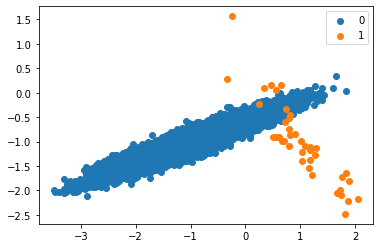

In [13]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=20000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.998], flip_y=0, random_state=4)
# summarize class distribution
counter = Counter(y)
print("The number of 0 and 1 labels are," ,counter[0]," and",counter[1], " ,respectively.")
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#### One-Class Support Vector Machines

Here we split the data randomly into test and train by using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. The 20% of the data is the test set and 80% is the train set. 
The *OneClassSVM* uses different kernels. Here we use the [rbf](https://scikit-learn.org/stable/modules/svm.html) kernel

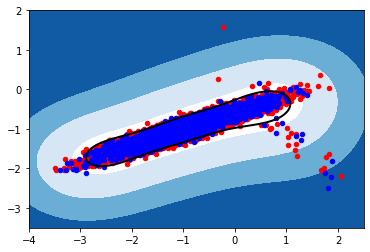

In [66]:
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

clf_svm = svm.OneClassSVM(nu=0.01,kernel = 'rbf', gamma = "auto")
clf_svm.fit(x_train)

y_pred_svm = clf_svm.predict(x_test)

def plot(arr, c="red"):
    plt.scatter(arr[:,0], arr[:,1], s=20, c=c)

xx, yy = np.meshgrid(np.linspace(-4,2.5, 500), np.linspace(-3.5,2, 500))
Z = clf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), -4, 4), cmap=plt.cm.Blues_r)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plot(x_train)
plot(x_test,c="blue")

In [71]:
percentage = float(sum(y_pred_svm ==1)/len(y_pred_svm))
print("This model predicts ", percentage*100,"% of the data labeled as 1 as outliers")

This model predicts  98.825 % of the data labeled as 1 as outliers


#### Isolation Forest

You can find useful information about the *Isolation Forest* from this link: [click here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html). This method randomly selectes features and then randomly selects a split value between the maximum and minimum values of the selected features to return the anomoly score of each sample using the *Isolation Forest* algorithm. Reminder the outliers are the data points with *1* label.


In [84]:
from sklearn.ensemble import IsolationForest

forest_clf = IsolationForest(max_samples = 200, contamination = 0.09, random_state=1001)
forest_clf.fit(x_train)

y_pred = forest_clf.predict(x_test)

percentage = float(sum(y_pred ==1)/len(y_pred))
print("This model predicts ", percentage*100,"% of the labeled data as 1 as outliers")

This model predicts  91.25 % of the labeled data as 1 as outliers


It is worth knowing that why almost 91% of the data is detected as outliers. We can take a look at the scores of the data points which are the indication of their anomoly of the data points. The scores are in the range of -0.5 to 0.5. The higher the scores means the data point has less anomolous.  

In [86]:
print("Anomoly score of the data points:")
forest_clf.decision_function(x_test)

Anomoly score of the data points:


array([0.14943151, 0.1318682 , 0.12921789, ..., 0.01855521, 0.15710856,
       0.03550591])